In [56]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [57]:
iris = datasets.load_iris()
data =  pd.DataFrame(iris.data, columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

In [58]:
data['target_names'] = iris.target

In [59]:
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
data.shape

(150, 5)

In [61]:
dataX = data.drop(columns=['target_names'])
dataY = data['target_names']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=42)

In [63]:
print("original data ", dataX.shape)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("accuracy score ", acc)
print()

original data  (150, 4)
accuracy score  1.0



In [64]:
for i in range(1, 4):
    pca = PCA(n_components=i)
    pca.fit(dataX)
    arr = np.cumsum(pca.explained_variance_ratio_)
    print("number of components: ", i, ", explained variance ", arr[len(arr) - 1]) 
    X_train_reduced = pca.transform(X_train)
    X_test_reduced = pca.transform(X_test)
    print("training data dimension ", X_train_reduced.shape[1])
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train_reduced, y_train)
    pred = clf.predict(X_test_reduced)
    print("accuracy score ", accuracy_score(pred, y_test))
    print()

number of components:  1 , explained variance  0.924618723201727
training data dimension  1
accuracy score  1.0

number of components:  2 , explained variance  0.9776852063187949
training data dimension  2
accuracy score  1.0

number of components:  3 , explained variance  0.9947878161267246
training data dimension  3
accuracy score  1.0



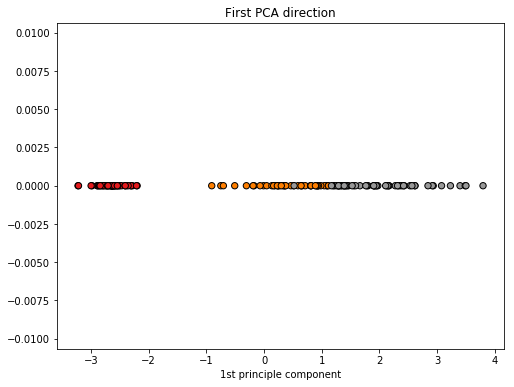

In [65]:
fig = plt.figure(1, figsize=(8, 6))
X_reduced = PCA(n_components=1).fit_transform(iris.data)
plt.scatter(X_reduced[:, 0], y=np.zeros(150),c=iris.target,cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("First PCA direction")
plt.xlabel("1st principle component")
fig.savefig("iris1.png")

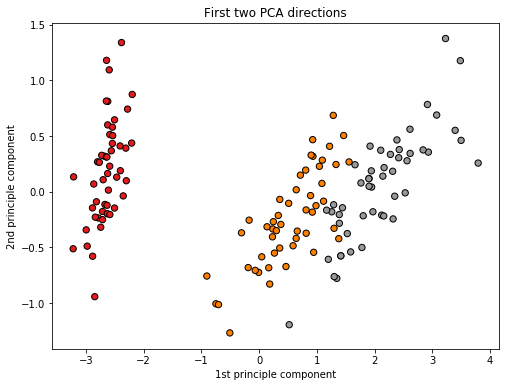

In [66]:
fig = plt.figure(1, figsize=(8, 6))
X_reduced = PCA(n_components=2).fit_transform(iris.data)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=iris.target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("First two PCA directions")
plt.xlabel("1st principle component")
plt.ylabel("2nd principle component")
fig.savefig("iris2.png")

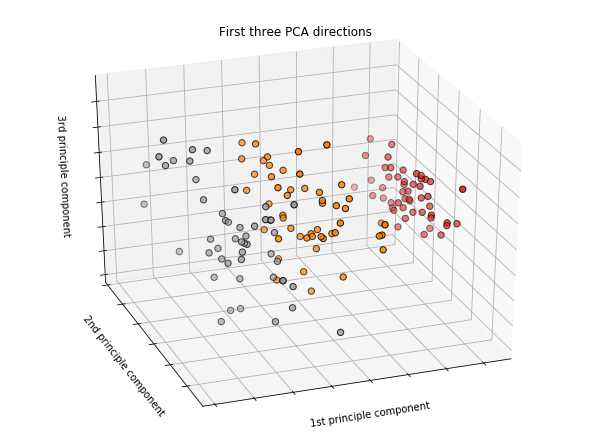

In [67]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=iris.target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st principle component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd principle component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd principle component")
ax.w_zaxis.set_ticklabels([])
plt.show()
fig.savefig("iris3.png")